# Flask Basics

Content & Descriptions were provided by:
* Kenneth Love of [Treehouse](https://teamtreehouse.com/kennethlove)
* Grinberg, Miguel. Flask Web Development: Developing Web Applications with Python. O'Reilly Media. Kindle Edition. 

[Flask Docs](http://flask.pocoo.org/)

Terms
* __View__ : A view is a function that returns an HTTP response. This response has to be a string (this could be HTML of course) but can be any string you want.
    * When Flask receives a request from a client, it needs to make a few objects available to the view function that will handle it. To avoid cluttering view functions with lots of arguments that may or may not be needed, Flask uses `contexts` to temporarily make certain objects globally accessible.
* __Route__ : A route is the URL path to a view. They always start with a forward slash / and can end with one if you want.
    * Clients such as web browsers send requests to the web server, which in turn sends them to the Flask application instance. The application instance needs to know what code needs to run for each URL requested, so it keeps a mapping of URLs to Python functions.
    * Flask supports types `int`, `float`, and `path` for routes. The `path` type also represents a string but does not consider slashes as separators and instead considers them part of the dynamic component.
* __Decerator__ : is a function that wraps around another function (e.g `@app.route('/')`).
    * A decorator is really just a function that takes another function and extends the behavior of the latter function without explicitly modifying it.
    * A common pattern is to use decorators to register functions as handlers for an event.
* __global__ : A global is a variable that exists outside of the normal Python scopes. It is available everywhere.
* __query string__ : The part of a URL that comes after the `?` . You'll notice that the information after this looks like keyword arguments. This is the most common way users send arguments and values through the url.
* __thread__ : The smallest sequence of instructions that can be managed independently. It is common for a process to have multiple active threads, sometimes sharing resources such as memory or file handles. Multithreaded web servers start a pool of threads and select a thread from the pool to handle each incoming request.
* __request__ : `request` is a Flask global that represents the http request that the client has made to your application. This contains things like cookies, the path, and, in our usage, the query string.
    * In reality, request cannot be a global variable if you consider that in a multithreaded server the threads are working on different requests from different clients at the same time, so each thread needs to see a different object in request. `Contexts` enable Flask to make certain variables globally accessible to a thread without interfering with the other threads.
    * You must import this Flask global with `from flask import request`. 
    * (side note: the fact that the request object is a global one makes Kenneth cringe, which suggests this is not a python best practice)

```python
from flask import Flask
from flask import request

app = Flask(__name__)


@app.route('/')
def index(name="Treehouse"):
    name = request.args.get('name', name)
    return "Hello from {}".format(name)

app.run(debug=True, port=8000, host='0.0.0.0')
```

Notes:
* In `from flask import Flask`, the second `Flask` is referring to a class called `Flask` in the flask framework.
* `app = Flask(__name__)` (the _application instance_) means whatever our current namespace is. If we run this file as `python simple_app.py`, then the namespace is `"__main__"`, which means it being run directly. If we were to import the app into another file, our namespace would be `simple_app`.
* Flask uses the `__name__` argument to determine the root path of the application so that it later can find resource files relative to the location of the application.
* `app.run(debug=True, port=8000, host='0.0.0.0')`
    * Once the server starts up (`app.run()` is executed), it goes into a loop that waits for requests and services them.
    * When debug is set to true this causes Flask to restart each time we save changes. 
    * The default port for Flask is 5000, and the host is 127.0.0.1
    * __The web server provided by Flask is not intended for production use.__
* `port=8000, host='0.0.0.0'` - Host at its current setting says listen at all address that can get to here.
* To start app type `python simple_app.py`, and type `http://0.0.0.0:8000` into your browser.
* `name = request.args.get('name', name)` - This code is essentially saying grab the 'name' attribute from the query string in our url, if it isn't there, grab (request object is like a dict, hence why the `.get` is used) our default value we've already specified in our function's arguments.
    * Before:
    ```
    http://0.0.0.0:8000/
    
    Hello from Treehouse
    ```
    * After:
    ```
    http://0.0.0.0:8000/?name=Zach
    
    Hello from Zach
    ```

## Code Challenge
Import request from Flask. Then update the index view to return "Hello {name}", replacing {name} with a name argument in the query string.
```python
from flask import Flask
from flask import request

app = Flask(__name__)

@app.route('/')
def index(name="Lawman"):
    name = request.args.get('name', name)
    return 'Hello {}'.format(name)
```

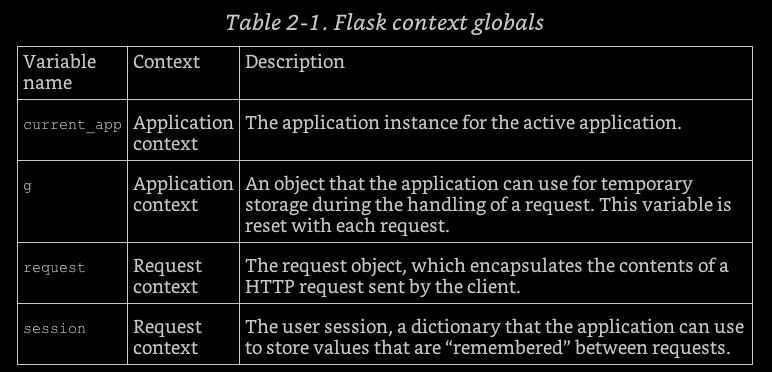

In [3]:
from IPython.core.display import Image, display
display(Image('/Users/lawerencelee/py_tech_degree/flask/flask_basics/context_globals.png', width=800, unconfined=True))

### Context Globals
Contexts enable Flask to make certain variables globally accessible to a thread without interfering with other threads.

* Flask pushes (activates) contexts before dispatching a request, and removes them upon completion (once the request is handled).
* Once the application and/or the request context is pushed their respective variables become available.
    * If context variables are accessed prior to them being pushed, an error will occur.
    
Sample Code:
```python
>>> from hello import app 
>>> from flask import current_app
>>> current_app.name 
Traceback (most recent call last): 
...
RuntimeError: working outside of application context 
>>> app_ctx = app.app_context() 
>>> app_ctx.push()
>>> current_app.name
'hello'
>>> app_ctx.pop()
```

## Request Dispatching
When Flask is given a request to service from a client, it looks up the request's URL in the application's URL map (`app.url()`). The URL map informs the app which `View Function` to run.
* The URL map is built with either the `app.route` decorator, or its equivalent nondecorator version `app.add_url_rule()`. 

#### Example Use of `app.url_map` with the sample `hello.py` app.
```python 
>>> from hello import app
>>> app.url_map Map([ <Rule '/' (HEAD, OPTIONS, GET) -> index>,
<Rule '/static/<filename>' (HEAD, OPTIONS, GET) -> static>,
<Rule '/user/<name>' (HEAD, OPTIONS, GET) -> user>])
```

The `/static/<filename>` route is a special route added by Flask to give access to static files.

The `HEAD`, `OPTIONS`, `GET` elements shown in the URL map are the request methods that are handled by the route. Flask attaches methods to each route so that different request methods sent to the same URL can be handled by different view functions. The `HEAD` and `OPTIONS` methods are managed automatically by Flask, so in practice it can be said that in this application the three routes in the URL map are attached to the `GET` method. 

## Request Hooks
Flask gives you the option to register common functions to be invoked before or after a request is dispatched to a view function. These functions are implemented as decorators.

#### Examples Cases:
* Creating a database connection before a request, and then promptly closing it after the request.
* Authenticating a user making a request.

#### Hooks Supported by Flask:
* __`before_first_request()`__ : Register a function to run before the first request is handled.
* __`before_request()`__ : Register a function to run before each request.
* __`after_request()`__ : Register a function to run after each request.
* __`teardown_request()`__ : Register a function to run after each request, even if unhandled exceptions occured.

A common pattern to share data between request hook functions and view functions is to use the `g` context global. For example, a `before_request` handler can load the logged-in user from the database and store it in `g.user`. Later, when the view function is invoked, it can access the user from there.

Example:
```python
@app.before_request
def before_request():
    """Connect to the database before each request."""
    g.db = models.DATABASE
    g.db.connect()
    g.user = current_user


@app.after_request
def after_request(response):
    """Close the database connection after each request."""
    g.db.close()
    return response
```

## Cleaning up URL Args
```python
from flask import Flask

app = Flask(__name__)


@app.route('/')
@app.route('/<name>')
def index(name="Treehouse"):
    return "Hello from {}".format(name)

app.run(debug=True, port=8000, host='0.0.0.0')
```
* In the scripts new form, we've dropped the request object, and the use of query strings. Now we can:
    * Before:
    ```
    http://0.0.0.0:8000/
    
    Hello from Treehouse
    ```
    * After:
    ```
    http://0.0.0.0:8000/Zach
    
    Hello from Zach
```

### Being careful with Types
* If we add in the following to our script...
```python
@app.route('/add/<num1>/<num2>')
def add(num1, num2):
    return '{} + {} = {}'.format(num1, num2, num1+num2)
```
* and type:
```
http://0.0.0.0:8000/add/2/5
```
* we get:
```
2 + 5 = 25
```
* This is clearly wrong, and the reason is because anything captured in a route argument will be a string unless you specify another type, so be careful with how you use the values.
* To remedy this:
```
@app.route('/add/<num1>/<num2>')
```
* becomes:
```
@app.route('/add/<int:num1>/<int:num2>')
```
* and now when we type:
```
http://0.0.0.0:8000/add/2/5
```
* we get:
```
2 + 5 = 7
```

### Avoiding Possible Future Errors

__Case 1 :__
* if we type:
```
http://0.0.0.0:8000/add/2/a
```
* we get:

```
Not Found

The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.
```
* Threw an error because 'a' is clearly not an integer.

__Case 2 :__
* If we change our script to:
```python
@app.route('/add/<num1>/<num2>')
    def add(num1, num2):
        return num1 + num2
```
* and we type:
```
http://0.0.0.0:8000/add/2/5
```
* we get:
```python
TypeError: 'int' object is not callable
```
* This is because functions in flask must return strings.

## Code Challenge
* Add a new route to hello() that expects a name argument. The view will need to accept a name argument, too.
* Update the response from hello() to say "Hello {name}", replacing {name} with the passed-in name.
* Now give hello() a default name argument of "Treehouse".

In [2]:
from flask import Flask

app = Flask(__name__)

@app.route('/<name>')
@app.route('/')
def hello(name="Treehouse"):
     return 'Hello {}'.format(name)

## Multiple Routes
* An example:
```python 
@app.route('/add/<int:num1>/<int:num2>')
@app.route('/add/<float:num1>/<float:num2>')
@app.route('/add/<int:num1>/<float:num2>')
@app.route('/add/<float:num1>/<int:num2>')
def add(num1, num2):
    return '{} + {} = {}'.format(num1, num2, num1+num2)
```

## Code Challenge
* Add a view named multiply. Give multiply a route named /multiply. Make multiply() return the product of 5 * 5. Remember, views have to return strings.
* Add a new route to multiply() that has two arguments. Add the same two arguments to the multiply() view. They should have defaults of 5.
* Mark both route arguments as ints.
* Account for both floats and ints.
* Multiply both products return their value as a str.

In [3]:
from flask import Flask

app = Flask(__name__)


@app.route('/multiply/<int:num1>/<int:num2>')
@app.route('/multiply/<float:num1>/<float:num2>')
@app.route('/multiply/<int:num1>/<float:num2>')
@app.route('/multiply/<float:num1>/<int:num2>')
@app.route('/multiply')
def multiply(num1=5, num2=5):
    return str(num1 * num2)

## Flat HTML (working w/ templates)
Things to Remember
* Use {{ and }} to print items in templates.
* Flask looks for templates in a directory named templates by default. This directory should be in the same directory as your app script.

Docs
* [Flask docs on templates](http://flask.pocoo.org/docs/0.10/templating/)
* [Jinja2](http://jinja.pocoo.org/) - The template engine used by Flask.

Notes:
* You can return HTML written in a flask view, however it is better to use templates.
* To use templates you must import `render_template` from flask, and use it as seen below:

```python
from flask import Flask
from flask import render_template

app = Flask(__name__)


@app.route('/add/<int:num1>/<int:num2>')
@app.route('/add/<float:num1>/<float:num2>')
@app.route('/add/<int:num1>/<float:num2>')
@app.route('/add/<float:num1>/<int:num2>')
def add(num1, num2):
    context = {'num1': num1, "num2": num2}
    return render_template("add.html", **context)

app.run(debug=True, port=8000, host='0.0.0.0')
```
* To reference the args in the flask view (python function) in your HTML template, use the syntax below:
```html
<!doctype HTML>
<html>
    <head>
        <title>Adding!</title>
    </head>
    <body>
        <h1>{{ num1 }} + {{ num2 }} = {{ num1 + num2 }}</h1>
    </body>
</html>
```

## Code Challenge
* Add an import for render_template. It comes directly from the flask library.
* Use render_template() to render the "hello.html" template in hello().
* Pass the name argument to the template. Print the name variable in the `<h1>` in the template.

```python
from flask import Flask
from flask import render_template

app = Flask(__name__)


@app.route('/hello/<name>')
def hello(name="Treehouse"):
    return render_template("hello.html", name=name)
```

```html
<!doctype html>
<html>
<head><title>Hello!</title></head>
<body>
<h1>Howdy {{ name }}!</h1>
</body>
</html>
```



## Template Inheritance (Jinja2 Syntax)

`{% block %}`: This template tag (as they're called) defines a block in a template. In templates that are extended, these areas are overridable. In templates that extend other templates, this areas will override the parent template's block.
   * You may name block as well, this block has a name of `title`:
    
    ```html
    {% block title %}{% endblock %}
    ```

`{% extends %}`: This template tag specifies what template is the parent of the current template. Think of it like extended classes in Python. You can have a change of extensions if you need them.

`{{ super() }}`: This function brings in whatever content was in the same block in the parent template. Very handy if you want to include the existing content but you want to insert new content before or after the old.
   * Super in action, along with extends:
   * This is `layout.html` (where all other html sheets inherit from)
   ```html
   <!doctype HTML>
    <html>
        <head>
            <title>{% block title %}Flask Basics{% endblock %}</title>
        </head>
        .....
   ```
   * This is `index.html` which inherits from `layout.html`:
   ```html
   {% extends "layout.html" %}

   {% block title %}Adding! | {{ super() }}{% endblock %}
   ```

## Code Challenge
* Add two blocks to the "layout.html" template. Add a block named title around the content of the `<title>` tag. Add a block named content inside the `<body>` tag
* Change "index.html" so it extends "layout.html".
* Put the contents of the `<title>` tag in "index.html" into the title block.
* Remove everything from "index.html" except for the extends and block tags and their contents.
* Finally, change the "index.html" `<title>` tag to be: {{ super() }} Homepage. Make sure there's a space before "Homepage".

layout.html
```html
<!doctype html>
<html>
<head><title>{% block title %}Smells Like Bakin'{% endblock %}</title></head>
<body>
{% block content %}{% endblock %}
</body>
</html>
```

index.html

```html
{% extends "layout.html" %}

{% block title %}
{{ super() }} Homepage
{% endblock %}

{% block content %}
<h1>Smells Like Bakin'!</h1>
<p>Welcome to my bakery web site!</p>
{% endblock %}


```

## Static Files

The static/ directory is served automatically at /static while you're running your Flask app.

You also don't have to use every block in every child template. If you don't specify a new version of the block, Flask will just use whatever is there in the parent template.

*** 
# Bear App

## Forms
__url_for()__: This function, always available in templates but importable in your app, finds the URL for a given view function name.

__redirect()__: This function returns an HTTP redirect to whatever URL is provided.


When submitting a form, an object is being returned from request.form, it is a `ImmutableMultiDict([()])`.


### Python Debugger (PDB) with Flask
* import request from flask
* include `import pdb; pdb.set_trace()`

## Cookies
The [JSON library docs](https://docs.python.org/3/library/json.html#module-json). 99% of the time, you won't need anything more than .loads() and .dumps().

__`Response`__ : A response is the data that the server, Flask, sends back to the client.

__`make_response()`__: This function generates the entire response object that'll be sent back to the client, but lets you store it in a variable for further manipulation.

__`response.set_cookie()`__: Sets a cookie on the response object. Takes name for the cookie and a value.

__`json.dumps()`__: This method turns a Python data structure (list, string, dictionary, etc) into a JSON string.

__`json.loads()`__: This method turns a JSON string into a Python object.

Notes:
* Setting cookies in Flask is quite different than setting them in Django, or JS in general. Cookies are actually set on the response, that is they are set post `return` statement. To remedy this we use the `make_response()` method, and then use the `.set_cookie()` method.
* `return response.set_cookie('character', json.dumps(dict(request.form.items())))`
    * The reason we have to use `dict(request.form.items())` instead of just `request.form.items()` is because what comes out of `request.form.items()` isn't really a dictionary, but rather this odd `ImmutableMultiDict([()])` object. When we ask for the items from a `ImmutableMultiDict([()])`, we get a tuple of key value pairs. So we call `dict` to create a dictionary from that.


* json.dumps stands for json dump string. Python String -----> JSON String
* json.loads stands for json load string. JSON String -----> Python String
    * In the case of our code though, the object we end with is a `dict` called data.
* To check if a cookie was created using Safari's Dev Tools we:
    * Click `Develop` menu
    * Click `Show Web Inspector`
    * Click `Storage`
    * Click `Cookies`
* In `index.html`, we have `<input type="text" name="name" value="{{ saves.get('name', "") }}" autofocus>`. The `saves.get('name', "")` essentially tries to grab the name key, if it is not there return an empty string.

### Quiz Questions
* Set a cookie named "name" to "Treehouse"
    * resp = make_response()
    * resp.set_cookie(  `<1>`   ,  `<2>`  )
    * 1 = "name", 2 = "Treehouse"
* When we create a cookie, we have to attach it to the response. What function gives us access to the response?
    * make_response()
* What json method creates a string?
    * json.dumps()
* How would you get all of the key & value pairs from the form?
    * request.form.items()
    
## Code Challenge
* Import make_response from flask
* In the save() function, remove the pass statement. Now add a variable named response and set it's value to make_response(). You'll need to return the response variable.
* Now set a cookie on the response object using the response.set_cookie method. The key should be treehouse but the value can be anything you want.

```python
from flask import Flask, make_response

app = Flask(__name__)


@app.route('/save')
def save():
    response = make_response()
    response.set_cookie('treehouse', 'coders')
    return response
```

## Starting the Builder
__`{% for x in y %}`__: You already know what for x in y: does in Python, but this is the template version. This will cause the enclosed code to be run as many times as there are things in y. Has to be followed by {% endfor %}.

__`{% if %}`__: The template version of Python's if condition. Closed with {% endif %}.

## Code Challenges
* Import json
* Create a function named to_json that takes a single argument. Convert the argument to string with the json library and return it.

```python
import json

def to_json(to_str):
    return json.dumps(to_str)
```
***
* Create a function named from_json that takes a single argument. Parse the argument with the json library and return it.

```python
import json

def from_json(item):
    return json.loads(item)
```
***
* Your template has been given a list named options. Loop through each item in options and create an `<li>` inside the `<ul>`. Print out the name key of each item.
```html
<ul>
  {% for option in options %}
  <li>{{ option.name }}</li>
  {% endfor %}
</ul>
```
***
* Loop through each of the teachers in teachers and create an `<li>` for them in the provided `<ul>`. Inside the `<li>`, create an `<h2>` that holds the teacher's 'name' key.
* Now add a new `<ul>` inside of the `<li>` with a class of "courses". Inside this `<ul>` loop through the teacher's 'courses' key, creating an `<li>` for each course and printing the course.
```html
<ul class="teachers">
  {% for teacher in teachers %}
  <li>
    <h2>{{ teacher.name }}</h2>
    <ul class="courses">
      {% for course in teacher.courses %}
      <li>{{ course }}</li>
      {% endfor %}
    </ul>
  </li>
  {% endfor %}
</ul>
```

## Flash Messages
* __flash()__: This function stores a message in the session that will self-destruct after the response is returned.
* __get_flashed_messages()__: This function gets all of the flash messages stored in the session.
* __app.secret_key__: This configuration attribute stores the secret key that all messages are cryptographically signed with.
* __{% with %}__: The Flask template version of Python's with block. Let's you temporarily define a variable. Must be closed with {% endwith %}.

Notes:
* Sessions in flask are cryptographically signed, which is why you need the secret key.

## Code Challenge
* Import flash from Flask.
* Add a secret_key attribute to the app object.
* flash() a message in the fishy() view before the return. The message can have any content you want.

```python
from flask import Flask, redirect, url_for, render_template, flash

app = Flask(__name__)
app.secret_key = "aasdfans;ans;3wef;a9anf3938(^#Hnrhnf9)K#&*)"

@app.route('/')
def index():
    return render_template("index.html")

@app.route('/fishy')
def fishy():
    flash("He sleeps with fishes")
    return redirect(url_for('index'))
```

## Heroku
[Deploying Flask on Heroku](https://devcenter.heroku.com/articles/getting-started-with-python-o)